# Struktur Neural Network

Dalam tutorial ini, kita akan mempelajari:
1. Konsep Dasar Neural Network
2. Komponen-komponen Neural Network
3. Forward Propagation
4. Fungsi Aktivasi
5. Visualisasi Neural Network
6. Latihan dan Implementasi

## 1. Konsep Dasar Neural Network

Neural Network (Jaringan Saraf Tiruan) adalah model komputasi yang terinspirasi dari cara kerja otak manusia. Terdiri dari:
- Input Layer (Layer Masukan)
- Hidden Layer (Layer Tersembunyi)
- Output Layer (Layer Keluaran)

Mari kita mulai dengan mengimport library yang diperlukan:

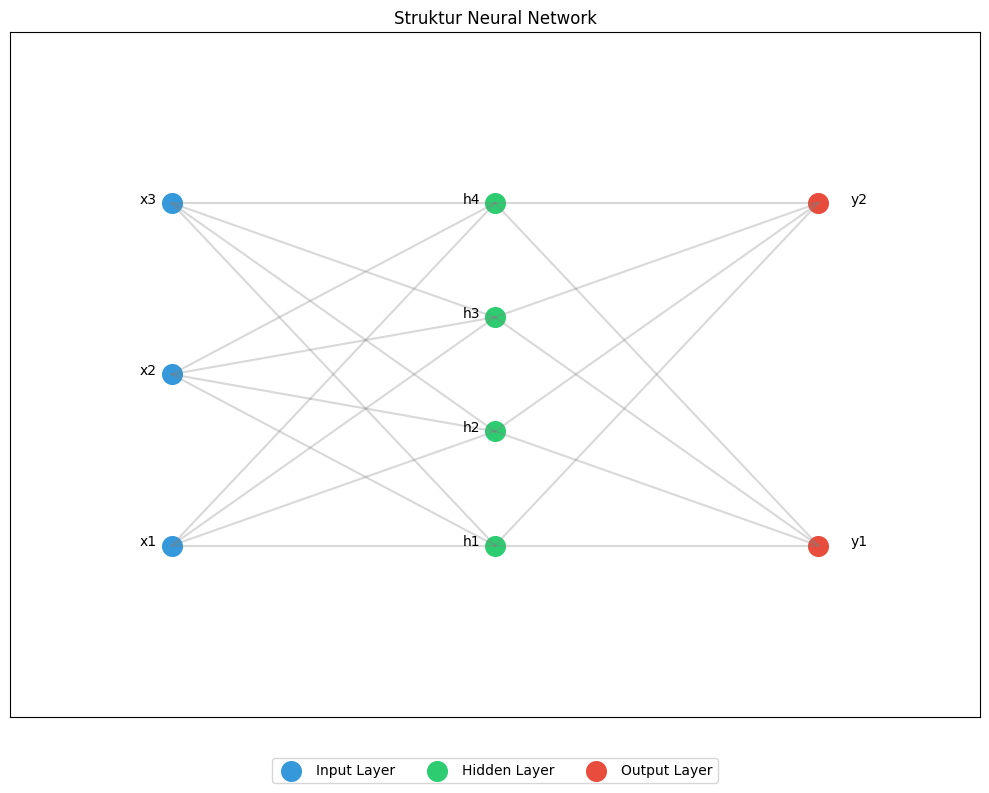

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def create_network_plot(num_inputs=3, num_hidden=4, num_outputs=2):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim([-0.5, 2.5])
    ax.set_ylim([-0.5, 1.5])
    
    # Posisi layer
    input_pos = np.array([[0, i/(num_inputs-1)] for i in range(num_inputs)])
    hidden_pos = np.array([[1, i/(num_hidden-1)] for i in range(num_hidden)])
    output_pos = np.array([[2, i/(num_outputs-1)] for i in range(num_outputs)])
    
    # Plot nodes
    ax.scatter(input_pos[:,0], input_pos[:,1], c='#3498db', s=200, label='Input Layer')
    ax.scatter(hidden_pos[:,0], hidden_pos[:,1], c='#2ecc71', s=200, label='Hidden Layer')
    ax.scatter(output_pos[:,0], output_pos[:,1], c='#e74c3c', s=200, label='Output Layer')
    
    # Plot connections
    for i in input_pos:
        for h in hidden_pos:
            ax.plot([i[0], h[0]], [i[1], h[1]], 'gray', alpha=0.3)
    
    for h in hidden_pos:
        for o in output_pos:
            ax.plot([h[0], o[0]], [h[1], o[1]], 'gray', alpha=0.3)
    
    # Labels
    for i in range(num_inputs):
        ax.annotate(f'x{i+1}', (input_pos[i,0]-0.1, input_pos[i,1]))
    
    for i in range(num_hidden):
        ax.annotate(f'h{i+1}', (hidden_pos[i,0]-0.1, hidden_pos[i,1]))
    
    for i in range(num_outputs):
        ax.annotate(f'y{i+1}', (output_pos[i,0]+0.1, output_pos[i,1]))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
    plt.title('Struktur Neural Network')
    plt.tight_layout()
    return fig

# Visualisasi struktur dasar neural network
create_network_plot()
plt.show()

## 2. Komponen-komponen Neural Network

### 2.1 Neuron
Neuron adalah unit dasar dalam neural network yang terdiri dari:
1. Input (x)
2. Weight (w)
3. Bias (b)
4. Fungsi Aktivasi (f)

Mari kita visualisasikan sebuah neuron tunggal:

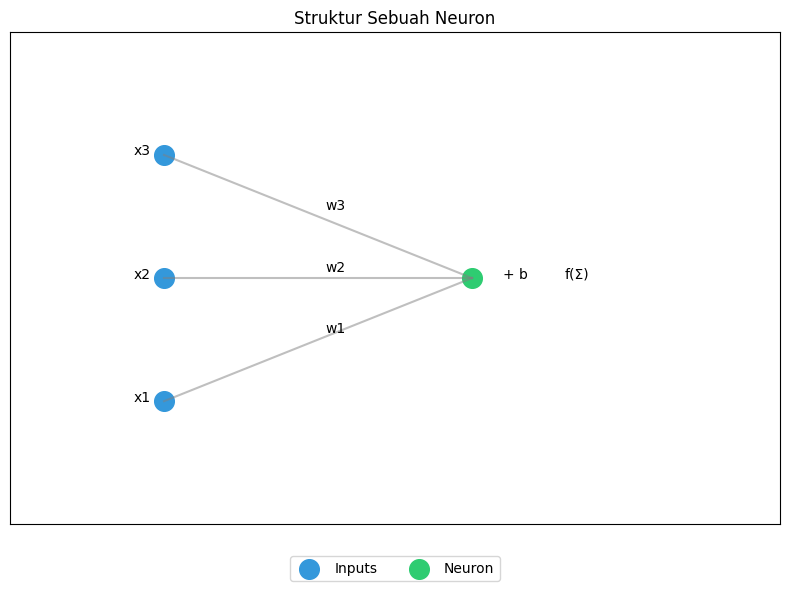

In [49]:
def plot_single_neuron():
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Input nodes
    input_pos = np.array([[0, i/2] for i in range(3)])
    neuron_pos = np.array([1, 0.5])
    
    # Plot nodes
    ax.scatter(input_pos[:,0], input_pos[:,1], c='#3498db', s=200, label='Inputs')
    ax.scatter(neuron_pos[0], neuron_pos[1], c='#2ecc71', s=200, label='Neuron')
    
    # Plot connections with weights
    for i, pos in enumerate(input_pos):
        ax.plot([pos[0], neuron_pos[0]], [pos[1], neuron_pos[1]], 'gray', alpha=0.5)
        mid_point = (pos + neuron_pos) / 2
        ax.annotate(f'w{i+1}', (mid_point[0], mid_point[1]), xytext=(5, 5), 
                   textcoords='offset points')
    
    # Labels
    for i in range(3):
        ax.annotate(f'x{i+1}', (input_pos[i,0]-0.1, input_pos[i,1]))
    
    # Add bias
    ax.annotate('+ b', (neuron_pos[0]+0.1, neuron_pos[1]))
    
    # Add activation function
    ax.annotate('f(Σ)', (neuron_pos[0]+0.3, neuron_pos[1]))
    
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([-0.5, 1.5])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    plt.title('Struktur Sebuah Neuron')
    plt.tight_layout()
    return fig

plot_single_neuron()
plt.show()

### 2.2 Forward Propagation

Forward propagation adalah proses perhitungan output dari sebuah neural network. Berikut adalah langkah-langkahnya:

1. Input layer menerima data (x₁, x₂, ..., xₙ)
2. Setiap neuron menghitung weighted sum: Σ(wᵢxᵢ) + b
3. Hasil weighted sum diproses melalui fungsi aktivasi
4. Output diteruskan ke layer berikutnya

Mari kita implementasikan forward propagation sederhana:

Input: [1.  0.5 0.2]
Weights: [ 0.5 -0.5  0.8]
Bias: 0.1
Output: 0.6248064744684293


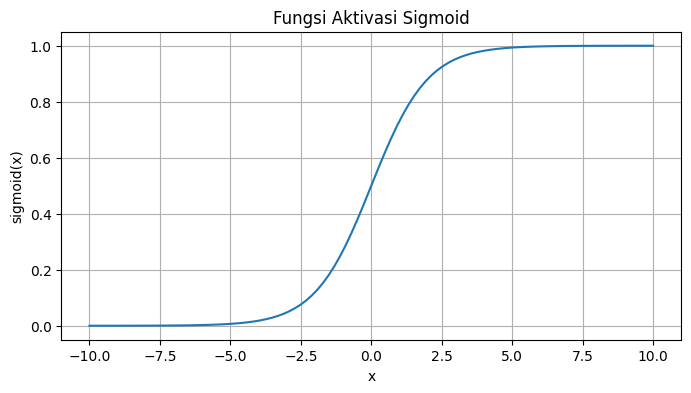

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class SimpleNeuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias
    
    def forward(self, inputs):
        # Weighted sum
        z = np.dot(self.weights, inputs) + self.bias
        # Aktivasi
        return sigmoid(z)

# Contoh penggunaan
neuron = SimpleNeuron(weights=[0.5, -0.5, 0.8], bias=0.1)
input_data = np.array([1, 0.5, 0.2])
output = neuron.forward(input_data)

print("Input:", input_data)
print("Weights:", neuron.weights)
print("Bias:", neuron.bias)
print("Output:", output)

# Visualisasi fungsi aktivasi sigmoid
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title('Fungsi Aktivasi Sigmoid')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

### 2.3 Fungsi Aktivasi

Fungsi aktivasi adalah komponen penting dalam neural network yang menentukan output dari sebuah neuron. Beberapa fungsi aktivasi yang umum digunakan:

1. Sigmoid (yang sudah kita lihat di atas)
2. ReLU (Rectified Linear Unit)
3. Tanh (Hyperbolic Tangent)

Mari kita visualisasikan dan implementasikan fungsi-fungsi aktivasi tersebut:

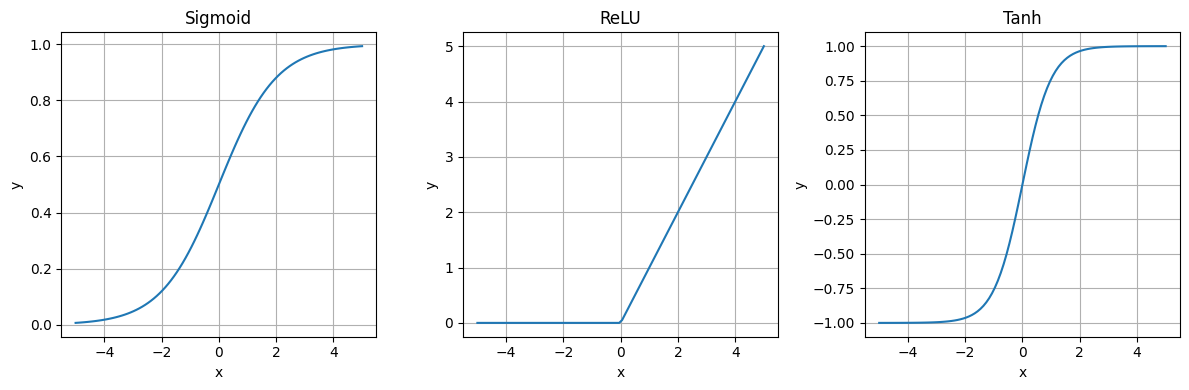

Karakteristik Fungsi Aktivasi:

Sigmoid:
- Range output: (0, 1)
- Cocok untuk: klasifikasi biner
- Kelemahan: vanishing gradient pada nilai ekstrim

ReLU:
- Range output: [0, ∞)
- Cocok untuk: hidden layer
- Keuntungan: mengatasi vanishing gradient, komputasi sederhana

Tanh:
- Range output: (-1, 1)
- Cocok untuk: hidden layer, normalisasi
- Karakteristik: zero-centered output


In [51]:
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 4))

# Sigmoid
plt.subplot(131)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

# ReLU
plt.subplot(132)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

# Tanh
plt.subplot(133)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Perbandingan karakteristik fungsi aktivasi
print("Karakteristik Fungsi Aktivasi:")
print("\nSigmoid:")
print("- Range output: (0, 1)")
print("- Cocok untuk: klasifikasi biner")
print("- Kelemahan: vanishing gradient pada nilai ekstrim")

print("\nReLU:")
print("- Range output: [0, ∞)")
print("- Cocok untuk: hidden layer")
print("- Keuntungan: mengatasi vanishing gradient, komputasi sederhana")

print("\nTanh:")
print("- Range output: (-1, 1)")
print("- Cocok untuk: hidden layer, normalisasi")
print("- Karakteristik: zero-centered output")

## Latihan

Mari kita coba implementasikan sebuah neural network sederhana dengan satu hidden layer untuk memecahkan masalah XOR. 
Problem XOR adalah salah satu masalah klasik yang tidak dapat diselesaikan dengan single layer perceptron.

Truth table XOR:
- 0 XOR 0 = 0
- 0 XOR 1 = 1
- 1 XOR 0 = 1
- 1 XOR 1 = 0

XOR Problem Results:
Input		Predicted	Expected
----------------------------------------
[0 0]	0.433		0
[0 1]	0.437		1
[1 0]	0.437		1
[1 1]	0.433		0


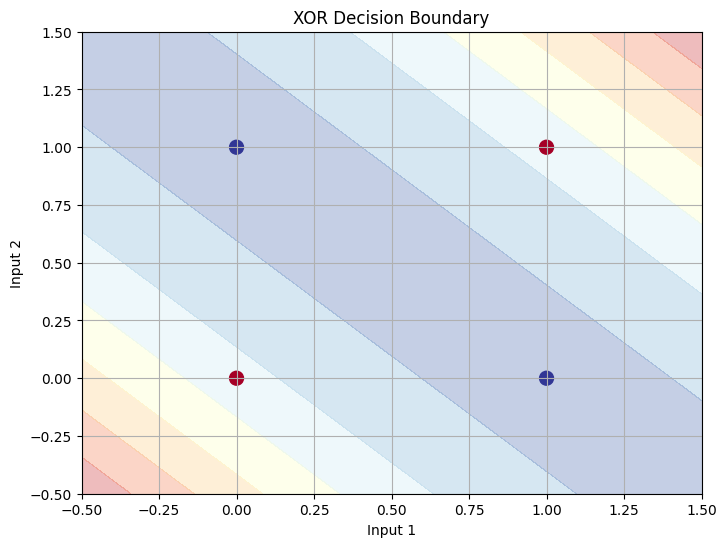

In [52]:
class SimpleNeuralNetwork:
    def __init__(self):
        # Inisialisasi weight dan bias
        # Hidden layer: 2 input -> 2 neurons
        self.hidden_weights = np.array([[0.5, 0.5],
                                      [-0.5, -0.5]])
        self.hidden_bias = np.array([0.0, 1.0])
        
        # Output layer: 2 input -> 1 neuron
        self.output_weights = np.array([1.0, 1.0])
        self.output_bias = -1.5
    
    def forward(self, x):
        # Hidden layer
        hidden = sigmoid(np.dot(self.hidden_weights, x) + self.hidden_bias)
        # Output layer
        output = sigmoid(np.dot(self.output_weights, hidden) + self.output_bias)
        return output

# Buat instance neural network
nn = SimpleNeuralNetwork()

# Data XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Test network
print("XOR Problem Results:")
print("Input\t\tPredicted\tExpected")
print("-" * 40)
for i in range(len(X)):
    pred = nn.forward(X[i])
    print(f"{X[i]}\t{pred:.3f}\t\t{y[i]}")

# Visualisasi decision boundary
def plot_decision_boundary():
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict for each point in the mesh
    Z = np.array([nn.forward(np.array([x, y])) 
                 for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=100)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.title('XOR Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

plot_decision_boundary()

## Latihan untuk Dikerjakan

1. Modifikasi kode neural network di atas untuk menyelesaikan masalah AND gate:
   - 0 AND 0 = 0
   - 0 AND 1 = 0
   - 1 AND 0 = 0
   - 1 AND 1 = 1

2. Tambahkan satu neuron lagi pada hidden layer dan amati perubahan pada decision boundary.

3. Coba implementasikan fungsi aktivasi ReLU sebagai pengganti sigmoid pada hidden layer.

4. Eksperimen dengan nilai weight dan bias yang berbeda untuk melihat pengaruhnya terhadap output.

Tips:
- Mulai dengan mengubah nilai weight dan bias pada SimpleNeuralNetwork
- Gunakan plot_decision_boundary untuk memvisualisasikan hasil
- Perhatikan bagaimana perubahan arsitektur mempengaruhi kemampuan network

## Kesimpulan

Dalam tutorial ini, kita telah mempelajari:
1. Struktur dasar neural network
2. Komponen-komponen penting (neuron, weight, bias)
3. Fungsi aktivasi dan karakteristiknya
4. Implementasi sederhana forward propagation
5. Visualisasi decision boundary untuk masalah XOR

Neural network bahkan dengan arsitektur sederhana dapat menyelesaikan masalah non-linear seperti XOR. Ini menunjukkan kekuatan dari deep learning dalam menyelesaikan masalah yang kompleks.